# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [26]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
############### TEST SETS ##############################
from scripts import process_log as pl
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

test = "d"

if test == "a":
    
    # Set the path to the file we would like to analyze
    pl.setLogPath("datasets/gc.log")
    pl.setLogSchema(1)
    
elif test == "b":
    
    pl.setLogPath("datasets/amzn_workload_4.log")
    pl.setLogSchema(0)
    
elif test == "c":O
    
    pl.setLogPath("datasets/FLIGHT_GC.log")
    pl.setLogSchema(0)
    
elif test == "d":
    
    pl.setLogPath("datasets/long_amzn_workload.log")
    pl.setLogSchema(0)
    
elif test == "incomplete_test_concurrent_pauses":
    pl.setLogPath("datasets/long_a.log")
    pl.setLogSchema(0)
    
elif test == "linux":
    #pl.setLogPath("datasets/linux_ubuntu.log")
    pl.setLogPath("datasets/run_out.log")
    pl.setLogSchema(0)

### Begin processing log information. Plots data and trends

Total pauses: 1110
Max wait: 181.425 ms
Total wait: 111792.804 ms
Average wait: 100.7142 ms
Total time: 3762.947
Total program runtime: 3762.947 seconds
Throughput: 97.0291%


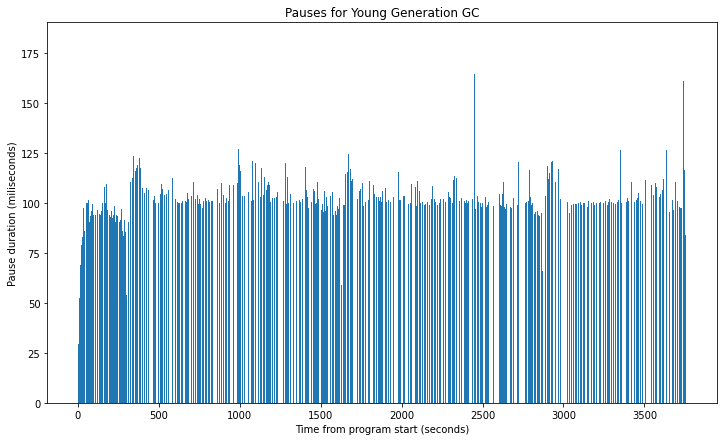

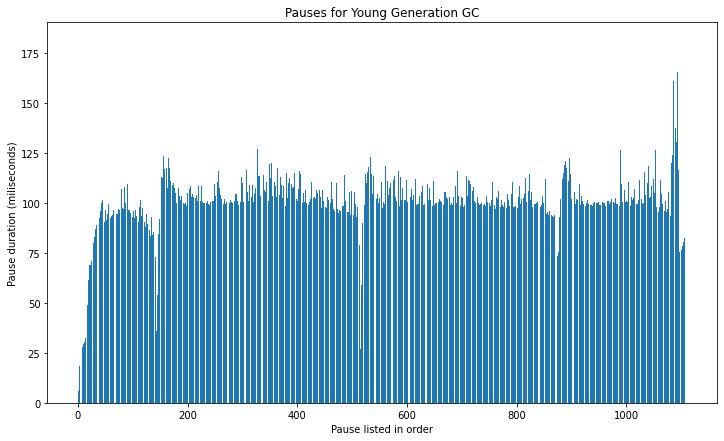

5


In [28]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
table_young_pauses = pl.getYoungPauses(create_csv = False)
for idx in range(len(table_young_pauses[-1])):
    if float(table_young_pauses[-1][idx]) > 1883:
        print(idx)
if len(table_young_pauses) > 0:
    # plot the data for pauses, printing to output the trends.
    dplt.plot_pauses(table_young_pauses)
    print(len(table_young_pauses))
else:
    print("No information recorded")

# To inspect more information about this, access the variable "table_ypauses"
# TODO: Transform second table into line graph

Heap allocation breakdown
2
This far


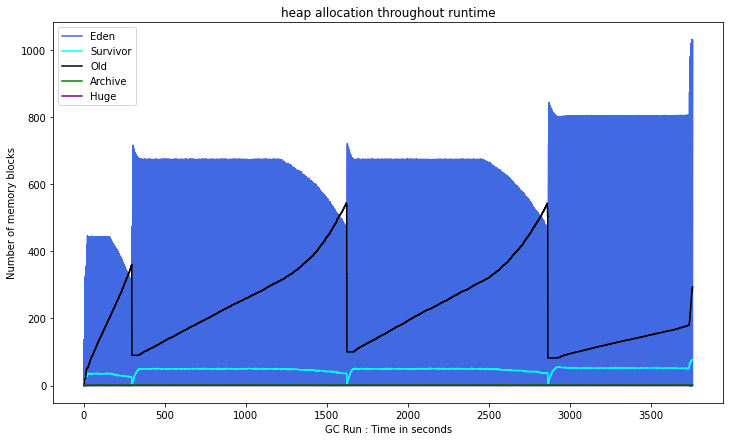

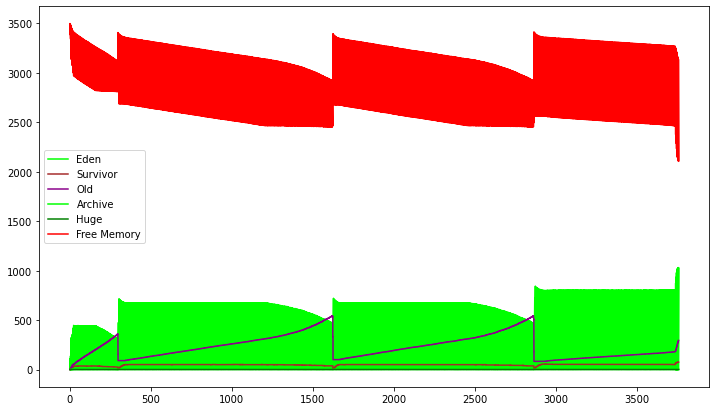

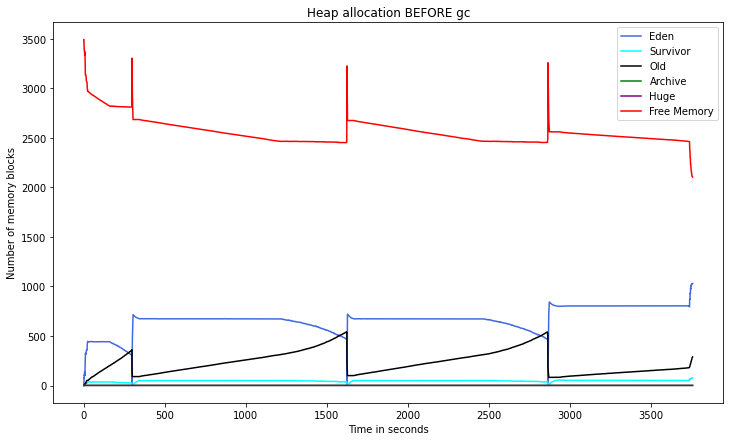

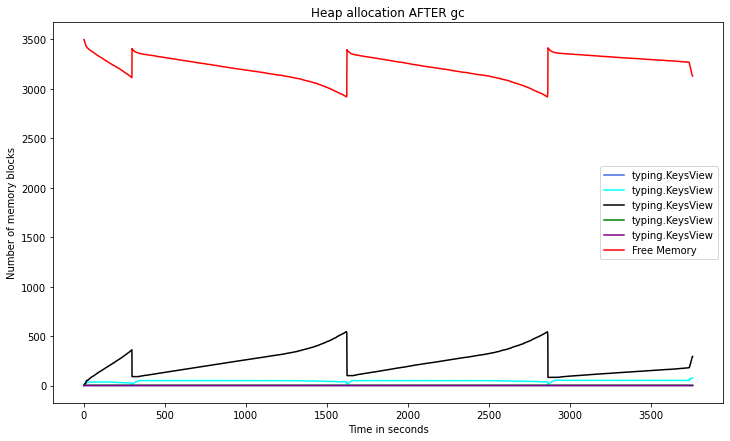

In [29]:
''' Analyze heap allocation througout the program '''
from scripts import process_log as pl
from scripts import plot_data as dplt

#################################################
# IMPORTANT NOTE: THE CURRENT X AXIS IS NOT TIME!! (fix later)
#################################################
# remove the following 2 lines after testing.

heap_allocation_sections = pl.getHeapAllocation(create_csv = False)



if heap_allocation_sections:
    print("Heap allocation breakdown")
    print(len(heap_allocation_sections))
    # plot the data for pauses, printing to output the trends.
    dplt.plot_heap_allocation_breakdown(heap_allocation_sections, 3500)
    dplt.heap_allocation_beforeafter_gc(heap_allocation_sections, 3500)
else:
    print("No log data collected")

#TODO: Fix formatting of table & color choices


Max time: 3759.153


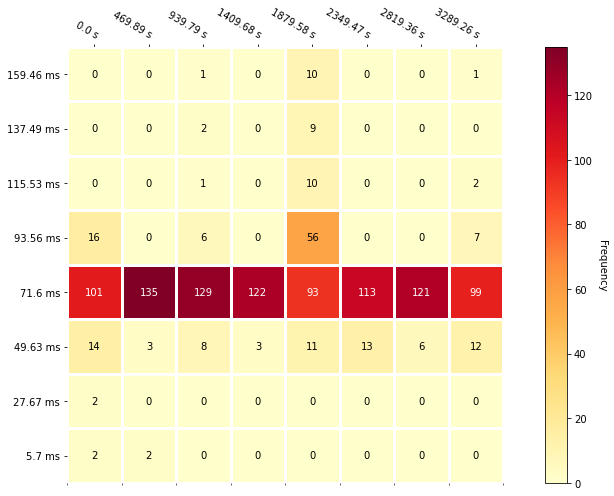

In [38]:
from scripts import plot_data as dplt
from scripts import process_log as pl

pl.setLogPath("datasets/long_amzn_workload.log")
pl.setLogSchema(0)
yp = pl.getYoungPauses()
dplt.plot_heatmap(yp,8)

In [31]:
# Get all metadata about the specific gc used
gc_metadata = pl.getGCMetadata2(create_csv = False)
if gc_metadata:
    # Create graphical table from metadata
    dplt.displayMetadata(gc_metadata)
else:
    print("Metadata not collected in GC logs")

Version . . . . . . . . . . . | 16.0.1+9 (release)
CPUs  . . . . . . . . . . . . | 16 total, 16 available
Memory  . . . . . . . . . . . | 65536M
Large Page Support  . . . . . | Disabled
NUMA Support  . . . . . . . . | Disabled
Compressed Oops . . . . . . . | Enabled (Zero based)
Pre-touch . . . . . . . . . . | Disabled
Parallel Workers  . . . . . . | 13
Heap Region Size  . . . . . . | 8M
Heap Initial Capacity . . . . | 1G
Heap Max Capacity . . . . . . | 16G
Heap Min Capacity . . . . . . | 8M
Concurrent Workers  . . . . . | 3
Concurrent Refinement Workers | 13
Periodic GC . . . . . . . . . | Disabled


###Below is just testing. Temporary below.

## Below, I test and compare the results of Zulu vs. my runtime pauses.
#### While this probably will not be in the final version, it is helpful for the script to be easily accessible, and maybe live in an archive after I finish with it.

In [32]:
# In this cell, I hope to be able to analyze the difference between this data and Java/Zulu Flight Recorder
from scripts import zulu_output_process as zul
from scripts import process_log as pl
import math 

pl.setLogPath("datasets/run_out.log") #temp
pl.setLogSchema(0)                               #temp


concurrent = pl.getYoungPauses(create_csv = False)


# Then, accessing the data from Zulu flight recorder is more difficult.
# Therefore, manually put the zulu pause time information into a file specified by FILEP
def remove_s(item):
    return float(item[:-1])
#mine = list(map(remove_s, concurrent[-1]))
mine = concurrent[-1]

#print(mine)
#rint(len(mine))
#zulu = zul.extract_zulu_pauses("datasets/temp")
with open("datasets/temp", 'r') as wqe:
    zulu = wqe.readlines()
#rint(len(zulu))
#rint(len(zulu))
zulu = list(map(remove_s, zulu))
t = []
sum_zulu = 0
sum_mine = 0
for idx in range(min(len(zulu),len(mine))):
    t.append([mine[idx], zulu[idx], float(zulu[idx]) - float(mine[idx])])
    sum_zulu += zulu[idx]
    sum_mine += mine[idx]
    
print("Sum zulu: \t", round(sum_zulu, 4))
print("Sum mine: \t", round(sum_mine, 4))
print("Difference : \t", round(sum_zulu - sum_mine, 4))
print("(Difference / zulu) * 100: \t", round(100 * ((sum_zulu - sum_mine) / sum_zulu), 4))

print("Number of pauses", len(zulu))

ma = list(([val[2] for val in t]))


print("Max difference in recorded times: ", round(max(ma), 4))
#print("Total squared difference in recorded times: ", sum([val * val for val in ma]))
print("Average time difference (absolute value)", round(math.sqrt(sum([val * val for val in ma])) / 128, 4))

    
print("\n\n| Mine       | Zulu | Difference (ms)")

for line in t:
    print(str(line[0]) +" ", "\t", line[1], "\t", line[2])



27.384
997.122
114.142
22.387
60.865
26.622
24.875
36.777
38.573
151.851
55.576
33.615
61.44
61.898
122.062
109.356
43.577
19.579
34.311
89.583
86.412
53.911
42.219
45.364
51.028
74.063
145.411
148.469
211.681
200.479
206.374
167.682
160.024
140.025
110.945
101.844
119.022
143.507
131.989
194.079
178.562
120.066
174.971
177.502
218.296
198.763
144.593
230.665
172.732
278.081
149.562
220.01
152.281
148.129
176.192
91.879
130.949
183.566
214.014
183.338
126.894
221.497
206.762
215.104
171.187
123.083
185.976
159.761
139.263
137.418
171.691
220.417
216.279
204.123
143.996
173.313
116.212
147.763
145.824
156.156
232.358
206.545
284.765
181.997
269.31
199.516
201.176
205.63
126.014
385.309
214.453
214.483
189.056
295.837
23.297
87.276
17.744
22.759
74.722
18.802
14.058
78.392
25.598
18.44
67.23
40.836
34.805
121.469
31.336
22.475
95.276
84.396
24.405
77.808
15.798
189.374
69.665
73.173
77.36
78.775
30.147
94.546
83.527
21.16
38.114
93.959
103.712
108.294
Sum zulu: 	 16858.166
Sum mine: 	 16

In [33]:
from scripts import process_log as pl


pl.setLogPath("datasets/long_amzn_workload.log") #temp
pl.setLogSchema(0)                               #temp

concurrent = pl.getConcurrentMarkPauses(False)
listdata = list(concurrent[4])

print(listdata)



Fuunction getConcurrentMarkPauses called.
['3125M->3125M(6360M)', '3125M->3125M(6360M)', '4910M->4838M(9640M)', '4838M->4838M(9640M)', '5093M->4773M(9640M)', '4824M->4824M(9640M)']


In [34]:
from scripts import process_log as pl
from scripts import plot_data as dplt


m = pl.getGCMetadata2(False)
dplt.displayMetadata(m)

Version . . . . . . . . . . . | 16.0.1+9 (release)
CPUs  . . . . . . . . . . . . | 16 total, 16 available
Memory  . . . . . . . . . . . | 65536M
Large Page Support  . . . . . | Disabled
NUMA Support  . . . . . . . . | Disabled
Compressed Oops . . . . . . . | Enabled (Zero based)
Pre-touch . . . . . . . . . . | Disabled
Parallel Workers  . . . . . . | 13
Heap Region Size  . . . . . . | 8M
Heap Initial Capacity . . . . | 1G
Heap Max Capacity . . . . . . | 16G
Heap Min Capacity . . . . . . | 8M
Concurrent Workers  . . . . . | 3
Concurrent Refinement Workers | 13
Periodic GC . . . . . . . . . | Disabled
